#### Sheida Majidi
### Kickstarter.xlsx - Kickstarter-Grading-Sample.xlsx

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Load the data from the Excel file
df = pd.read_excel('Kickstarter.xlsx')
df.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,15000.0,5933.0,failed,False,GB,GBP,2016-03-19 09:31:29,2016-03-19 09:31:32,2015-12-18 03:17:13,2016-02-18 09:31:29,False,66,1.429989,8484.125686,Gadgets,False,8.0,8.0,18.0,14.0,Saturday,Saturday,Friday,Thursday,3,19,2016,9,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,30
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,9000.0,16552.0,successful,False,DE,EUR,2016-04-03 08:05:09,2016-04-03 08:05:10,2016-02-08 09:27:33,2016-02-18 08:05:09,False,131,1.114939,18454.471487,NaN,True,9.0,6.0,23.0,15.0,Sunday,Sunday,Monday,Thursday,4,3,2016,8,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,45
2,839314928,PlantSitter - The World's Smartest Plant Monit...,60000.0,43234.0,canceled,False,US,USD,2016-03-29 08:01:08,2016-03-28 09:46:41,2016-01-31 05:21:52,2016-02-18 08:01:08,False,632,1.000000,43234.000000,Gadgets,False,8.0,8.0,22.0,12.0,Tuesday,Monday,Sunday,Thursday,3,29,2016,8,3,28,2016,9,1,31,2016,5,2,18,2016,8,18,40,39
3,681077916,Digital Video LUT Box for Colorblindness Corre...,125000.0,1262.0,canceled,False,US,USD,2016-03-19 07:48:02,2016-02-23 09:30:28,2016-01-28 11:21:14,2016-02-18 07:48:02,False,4,1.000000,1262.000000,Hardware,False,7.0,6.0,24.0,16.0,Saturday,Tuesday,Thursday,Thursday,3,19,2016,7,2,23,2016,9,1,28,2016,11,2,18,2016,7,20,30,5
4,1315415013,help send Object Collection to Norway!,2000.0,2300.0,successful,False,US,USD,2016-03-03 17:00:00,2016-03-03 17:00:00,2016-02-16 10:00:06,2016-02-18 07:00:44,False,29,1.000000,2300.000000,Experimental,True,6.0,5.0,19.0,13.0,Thursday,Thursday,Tuesday,Thursday,3,3,2016,17,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,14


## Data Processing

In [3]:
# keep just 'failed' and 'successful' for 'state'
df = df[df['state'].isin(['failed','successful'])]

# Handling missing values in 'category'
df['category'] = df['category'].fillna('unknown')

# Drop rows with any null values
df_cleaned = df.dropna()
null_values = df_cleaned.isnull().sum()

# Check and drop NaN values in 'state'
df_cleaned = df_cleaned.dropna(subset=['state'])

# Convert goal amount to USD
df_cleaned['goal_usd'] = df_cleaned['goal'] * df_cleaned['static_usd_rate']

df_cleaned.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,goal_usd
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,15000.0,5933.0,failed,False,GB,GBP,2016-03-19 09:31:29,2016-03-19 09:31:32,2015-12-18 03:17:13,2016-02-18 09:31:29,False,66,1.429989,8484.125686,Gadgets,False,8.0,8.0,18.0,14.0,Saturday,Saturday,Friday,Thursday,3,19,2016,9,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,30,21449.83740
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,9000.0,16552.0,successful,False,DE,EUR,2016-04-03 08:05:09,2016-04-03 08:05:10,2016-02-08 09:27:33,2016-02-18 08:05:09,False,131,1.114939,18454.471487,unknown,True,9.0,6.0,23.0,15.0,Sunday,Sunday,Monday,Thursday,4,3,2016,8,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,45,10034.45163
4,1315415013,help send Object Collection to Norway!,2000.0,2300.0,successful,False,US,USD,2016-03-03 17:00:00,2016-03-03 17:00:00,2016-02-16 10:00:06,2016-02-18 07:00:44,False,29,1.000000,2300.000000,Experimental,True,6.0,5.0,19.0,13.0,Thursday,Thursday,Tuesday,Thursday,3,3,2016,17,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,14,2000.00000
5,836821539,The Tragedy of Mario and Juliet,3000.0,3255.0,successful,False,US,USD,2016-04-18 04:13:25,2016-04-18 04:13:25,2016-01-27 17:18:58,2016-02-18 04:13:25,False,24,1.000000,3255.000000,Plays,True,6.0,4.0,19.0,14.0,Monday,Monday,Wednesday,Thursday,4,18,2016,4,4,18,2016,4,1,27,2016,17,2,18,2016,4,21,60,60,3000.00000
6,2077265745,Timepiece Pulu,35000.0,823.0,failed,False,US,USD,2016-03-25 21:46:51,2016-03-25 21:46:51,2016-01-24 23:54:17,2016-02-17 21:46:51,False,9,1.000000,823.000000,Gadgets,False,2.0,2.0,20.0,15.0,Friday,Friday,Sunday,Wednesday,3,25,2016,21,3,25,2016,21,1,24,2016,23,2,17,2016,21,23,37,37,35000.00000


In [4]:
# Feature engineering:

# Encoding the 'state' variable as binary (1 for 'successful', 0 for 'failed')
df_cleaned['state'] = df_cleaned['state'].map({'failed': 0, 'successful': 1})

# Creating label encoders for 'category' and 'country' columns
category_encoder = LabelEncoder()
country_encoder = LabelEncoder()

# Applying label encoding to 'category' and 'country' columns
df_cleaned['category_encoded'] = category_encoder.fit_transform(df_cleaned['category'])
df_cleaned['country_encoded'] = country_encoder.fit_transform(df_cleaned['country'])
df_cleaned.columns

Index(['id', 'name', 'goal', 'pledged', 'state', 'disable_communication',
       'country', 'currency', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'goal_usd', 'category_encoded',
       'country_encoded'],
      dtype='object')

In [5]:
# Drop unnecessary variables

# Columns to keep
columns_to_keep = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean', 
                   'launched_at_month', 'launched_at_day', 'country', 'category', 
                   'create_to_launch_days', 'launch_to_deadline_days', 'state',
                  'category_encoded', 'country_encoded']

# Dropping all other columns except the specified ones
df_cleaned = df_cleaned[columns_to_keep]

In [6]:
# Standardization:

# List of numerical columns to be normalized
numerical_cols = ['goal_usd', 'create_to_launch_days', 'launch_to_deadline_days','launched_at_month',
                  'launched_at_day','launch_to_deadline_days','blurb_len_clean', 'name_len_clean']

scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

df_cleaned.head()

,goal_usd,staff_pick,blurb_len_clean,name_len_clean,launched_at_month,launched_at_day,country,category,create_to_launch_days,launch_to_deadline_days,state,category_encoded,country_encoded
0,-0.045784,False,0.292599,1.181541,-1.373369,0.306247,GB,Gadgets,0.151001,-0.372395,0,6,9
1,-0.053290,False,0.607313,0.352998,-1.373369,0.306247,DE,unknown,-0.373719,0.884306,1,22,5
4,-0.058573,False,-0.022115,-0.061274,-1.373369,0.306247,US,Experimental,-0.452922,-1.712877,1,3,17
5,-0.057915,False,0.292599,-0.475546,-1.373369,0.306247,US,Plays,-0.254915,2.141007,1,12,17
6,-0.036874,False,0.607313,-1.304089,-1.373369,0.192632,US,Gadgets,-0.235114,0.214065,0,6,17


## Part 1 - Classification Model (Supervised Learning)

In [7]:
# non-numeric columns
non_numeric_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print(non_numeric_columns)

['country', 'category']


In [8]:
df_cleaned.columns

Index(['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
       'launched_at_month', 'launched_at_day', 'country', 'category',
       'create_to_launch_days', 'launch_to_deadline_days', 'state',
       'category_encoded', 'country_encoded'],
      dtype='object')

### Logistic Regression

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features and target
features_to_use = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
                   'launched_at_month', 'launched_at_day', 'category_encoded', 
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days']
X = df_cleaned[features_to_use]
y = df_cleaned['state']
X['staff_pick'] = X['staff_pick'].astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7276110146365666
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82      2683
           1       0.71      0.31      0.43      1348

    accuracy                           0.73      4031
   macro avg       0.72      0.62      0.63      4031
weighted avg       0.72      0.73      0.69      4031

Confusion Matrix:
 [[2512  171]
 [ 927  421]]


In [10]:
# Hyperparameter tuning:

from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize the GridSearchCV object for Logistic Regression
logistic_grid_search = GridSearchCV(LogisticRegression(), logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best Score for Logistic Regression:", logistic_grid_search.best_score_)


Best Parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Best Score for Logistic Regression: 0.7380625968531904


### RandomForest

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
features_to_use = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
                   'launched_at_month', 'launched_at_day', 'category_encoded', 
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days']
X = df_cleaned[features_to_use]
y = df_cleaned['state']
X['staff_pick'] = X['staff_pick'].astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForest Classifier Model
rf_model = RandomForestClassifier(max_depth=10, n_estimators=300)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7650707020590424
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83      2683
           1       0.69      0.54      0.60      1348

    accuracy                           0.77      4031
   macro avg       0.74      0.71      0.72      4031
weighted avg       0.76      0.77      0.76      4031

Confusion Matrix:
 [[2360  323]
 [ 624  724]]


In [12]:
# Hyperparameter tuning:

# Parameter grid for Random Forest
random_forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10]
}

# Initialize the GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), random_forest_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Score for Random Forest:", rf_grid_search.best_score_)


Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best Score for Random Forest: 0.7774097639327204


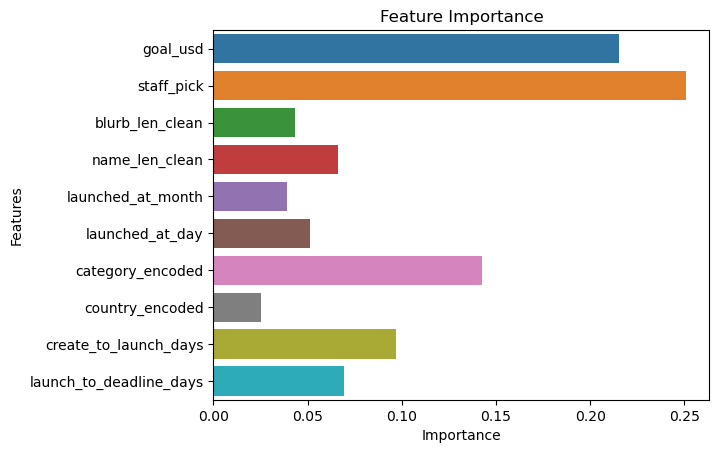

In [13]:
# Feature importance:

import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
feature_importances = rf_model.feature_importances_

# Creating a bar plot for feature importances
features = X.columns
sns.barplot(x=feature_importances, y=features)

# Adding chart labels and title
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

### Gradient Boosting

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
features_to_use = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
                   'launched_at_month', 'launched_at_day', 'category_encoded', 
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days']
X = df_cleaned[features_to_use]
y = df_cleaned['state']
X['staff_pick'] = X['staff_pick'].astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Gradient Boosting Classifier Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.765814934259489
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      2659
           1       0.69      0.56      0.62      1372

    accuracy                           0.77      4031
   macro avg       0.74      0.72      0.73      4031
weighted avg       0.76      0.77      0.76      4031

Confusion Matrix:
 [[2313  346]
 [ 598  774]]


In [15]:
# Hyperparameter tuning:

# Parameter grid for Gradient Boosting
gradient_boosting_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the GridSearchCV object for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gradient_boosting_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best Score for Gradient Boosting:", gb_grid_search.best_score_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Score for Gradient Boosting: 0.7813466128247762


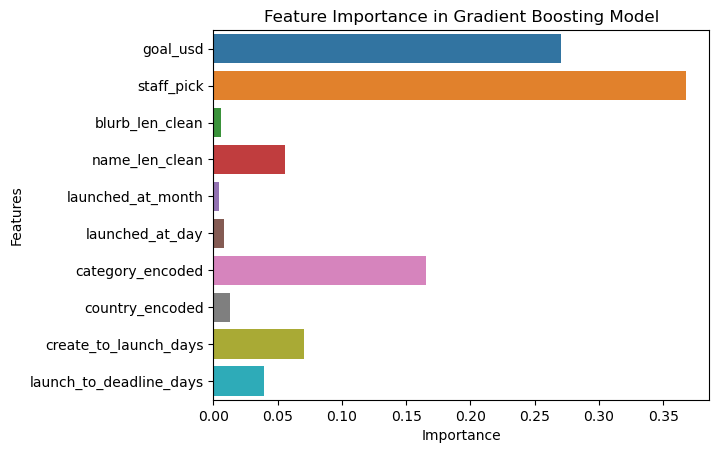

In [16]:
# Feature importance: 

import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
feature_importances = gb_model.feature_importances_

# Creating a bar plot for feature importances
features = X.columns
sns.barplot(x=feature_importances, y=features)

# Adding chart labels and title
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the plot
plt.show()

## Part 1 - Test on "Kickstarter-Grading-Sample.xlsx"

In [17]:
# Load the grading sample dataset
grading_df = pd.read_excel('Kickstarter-Grading-Sample.xlsx')

#### Preprocessing grading sample dataset

In [18]:
# Preprocessing steps 
grading_df['category'] = grading_df['category'].fillna('unknown')
grading_df_cleaned = grading_df.dropna(subset=['state'])
grading_df_cleaned['goal_usd'] = grading_df_cleaned['goal'] * grading_df_cleaned['static_usd_rate']
grading_df_cleaned['state'] = grading_df_cleaned['state'].map({'failed': 0, 'successful': 1})

# Label Encoding
category_encoder = LabelEncoder()
country_encoder = LabelEncoder()
grading_df_cleaned['category_encoded'] = category_encoder.fit_transform(grading_df_cleaned['category'])
grading_df_cleaned['country_encoded'] = country_encoder.fit_transform(grading_df_cleaned['country'])

# Selecting columns
columns_to_keep = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean', 
                   'launched_at_month', 'launched_at_day', 'category_encoded', 'state',
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days']
grading_df_cleaned = grading_df_cleaned[columns_to_keep]

# Check and drop any NaN values in the grading dataset
grading_df_cleaned = grading_df_cleaned.dropna()

# Standardization
scaler = StandardScaler()
grading_df_cleaned[numerical_cols] = scaler.fit_transform(grading_df_cleaned[numerical_cols])
grading_df_cleaned.head()

,goal_usd,staff_pick,blurb_len_clean,name_len_clean,launched_at_month,launched_at_day,category_encoded,state,country_encoded,create_to_launch_days,launch_to_deadline_days
0,-0.109563,False,1.149232,-0.458427,1.439127,0.674632,6,0.0,16,0.886091,-0.37724
1,-0.029555,True,-0.084985,-1.253519,1.439127,0.674632,23,1.0,16,0.085269,-0.37724
3,-0.127564,False,1.149232,-1.253519,1.439127,0.674632,21,0.0,16,-0.270653,-0.37724
4,-0.084132,False,-0.702093,1.131756,1.439127,0.674632,23,0.0,11,-0.367048,-0.37724
5,-0.117896,False,-1.936310,0.336665,1.439127,0.674632,23,0.0,9,-0.404123,-0.37724


In [19]:
# Define features for the grading dataset
features_to_use = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
                   'launched_at_month', 'launched_at_day', 'category_encoded', 
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days']
X_grading = grading_df_cleaned[features_to_use]
#X_grading['staff_pick'] = X_grading['staff_pick'].astype(int)

y_grading = grading_df_cleaned['state']

In [20]:
# Apply Logistic Regression model

y_pred_logistic = logistic_model.predict(X_grading)
accuracy_logistic = accuracy_score(y_grading, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.7314285714285714


In [21]:
# RandomForest Classifier Model
 
y_pred_rf = rf_model.predict(X_grading)
accuracy_rf = accuracy_score(y_grading, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.648


In [22]:
# Apply Gradient Boosting model

y_pred_gb = gb_model.predict(X_grading)
accuracy_gb = accuracy_score(y_grading, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.5531428571428572


## Part 2 - Clustering Model (Unsupervised Learning)

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Preprocessing dataset

In [23]:
# Load and preprocess the data
df = pd.read_excel('Kickstarter.xlsx')


df = df[df['state'].isin(['failed', 'successful'])]
df['category'] = df['category'].fillna('unknown')
df_cleaned = df.dropna(subset=['state'])
df_cleaned['goal_usd'] = df_cleaned['goal'] * df_cleaned['static_usd_rate']
df_cleaned['state'] = df_cleaned['state'].map({'failed': 0, 'successful': 1})

category_encoder = LabelEncoder()
country_encoder = LabelEncoder()
df_cleaned['category_encoded'] = category_encoder.fit_transform(df_cleaned['category'])
df_cleaned['country_encoded'] = country_encoder.fit_transform(df_cleaned['country'])

columns_to_keep = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
                   'launched_at_month', 'launched_at_day', 'category_encoded', 
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days','state']
df_cleaned = df_cleaned[columns_to_keep]

# List of numerical columns to be normalized
numerical_cols = ['goal_usd', 'create_to_launch_days', 'launch_to_deadline_days','launched_at_month',
                  'launched_at_day','launch_to_deadline_days','blurb_len_clean', 'name_len_clean']

scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

df_cleaned.head()

,goal_usd,staff_pick,blurb_len_clean,name_len_clean,launched_at_month,launched_at_day,category_encoded,country_encoded,create_to_launch_days,launch_to_deadline_days,state
0,-0.045782,False,0.292687,1.181589,-1.373222,0.306195,6,9,0.151024,-0.372419,0
1,-0.053288,False,0.607394,0.353015,-1.373222,0.306195,22,5,-0.373715,0.884329,1
4,-0.058571,False,-0.022019,-0.061272,-1.373222,0.306195,3,17,-0.452921,-1.712949,1
5,-0.057914,False,0.292687,-0.475559,-1.373222,0.306195,12,17,-0.254906,2.141076,1
6,-0.036871,False,0.607394,-1.304133,-1.373222,0.192578,6,17,-0.235105,0.214063,0


In [24]:
# Isolation Forest for outlier detection

# The 'contamination' parameter is the proportion of outliers we expect in the data
# It can be set to 'auto' for IsolationForest to determine it automatically
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=0)
outliers = iso_forest.fit_predict(df_cleaned)

# Convert numpy array to a DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=columns_to_keep)

# Add a new column for outliers, where -1 indicates an outlier and 1 indicates an inlier
df_cleaned['outlier'] = outliers

# Display the first few rows with outlier labels
print(df_cleaned.head())

   goal_usd  staff_pick  blurb_len_clean  name_len_clean  launched_at_month  \
0 -0.045782       False         0.292687        1.181589          -1.373222   
1 -0.053288       False         0.607394        0.353015          -1.373222   
4 -0.058571       False        -0.022019       -0.061272          -1.373222   
5 -0.057914       False         0.292687       -0.475559          -1.373222   
6 -0.036871       False         0.607394       -1.304133          -1.373222   

   launched_at_day  category_encoded  country_encoded  create_to_launch_days  \
0         0.306195                 6                9               0.151024   
1         0.306195                22                5              -0.373715   
4         0.306195                 3               17              -0.452921   
5         0.306195                12               17              -0.254906   
6         0.192578                 6               17              -0.235105   

   launch_to_deadline_days  state  outlier  

### K-means

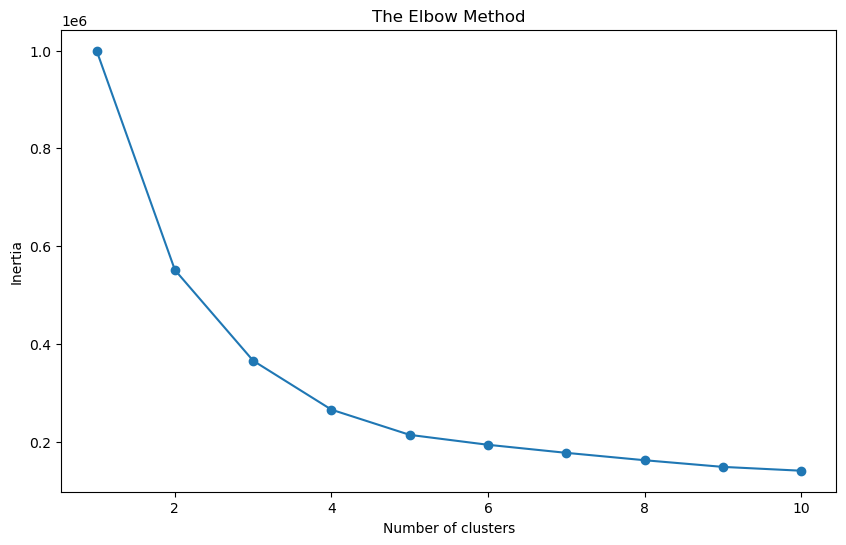

In [25]:
# K-means Clustering

# Determining the number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Fitting K-means to the dataset with the optimal number of clusters
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df_cleaned['cluster'] = kmeans.fit_predict(df_cleaned)

# Display the first few rows with cluster labels
df_cleaned.head()
df_cleaned.columns

Index(['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
       'launched_at_month', 'launched_at_day', 'category_encoded',
       'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days',
       'state', 'outlier', 'cluster'],
      dtype='object')

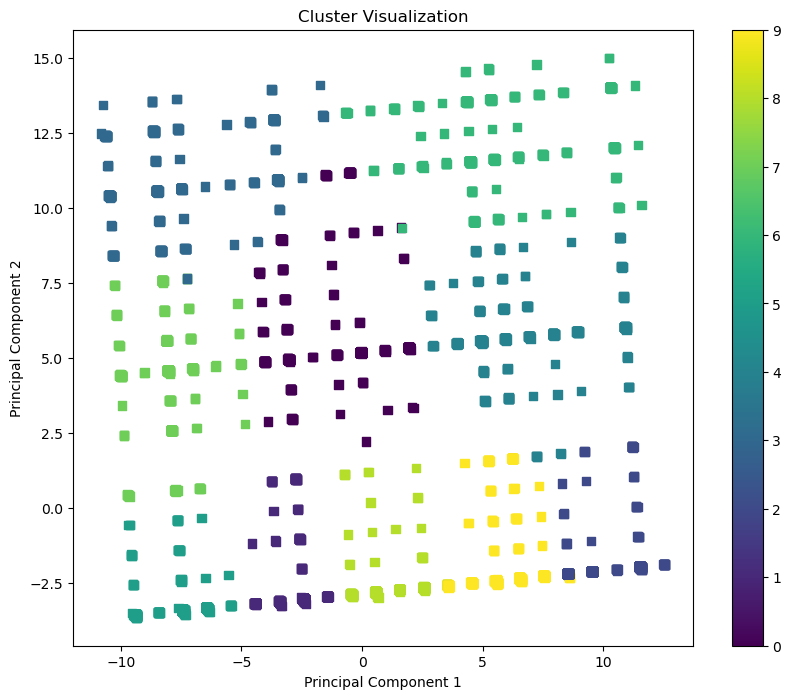

In [27]:
# PCA


# Reduce data dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned[columns_to_keep])

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned['cluster'], cmap='viridis', marker='s')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()  # Show color scale
plt.show()

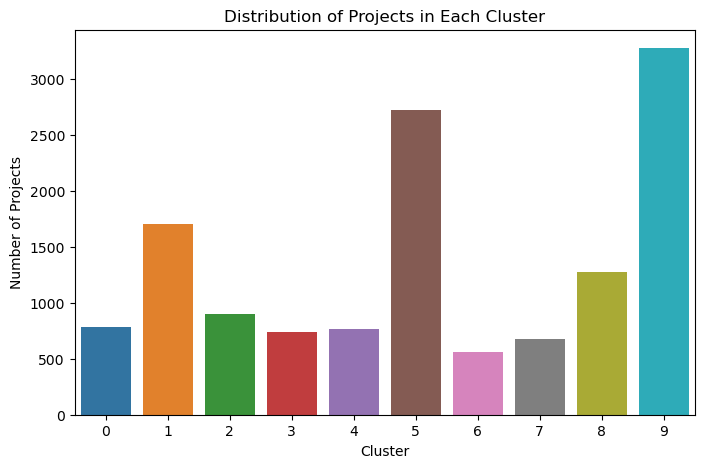

         goal_usd  staff_pick  blurb_len_clean  name_len_clean  \
cluster                                                          
0       -0.033589    0.096447         0.111771       -0.141185   
1        0.006451    0.084795        -0.106309       -0.099067   
2       -0.041164    0.140487         0.004091       -0.087852   
3        0.073235    0.053908        -0.113207       -0.193040   
4        0.008206    0.147906         0.178998        0.038504   
5        0.014823    0.130913        -0.065411       -0.118546   
6       -0.022780    0.104982         0.089416        0.104590   
7       -0.012112    0.088106        -0.004920       -0.191459   
8       -0.026914    0.155051         0.053639        0.042543   
9        0.002146    0.161890         0.030560        0.248307   

         launched_at_month  launched_at_day  category_encoded  \
cluster                                                         
0                -0.047623        -0.007549         13.072335   
1           

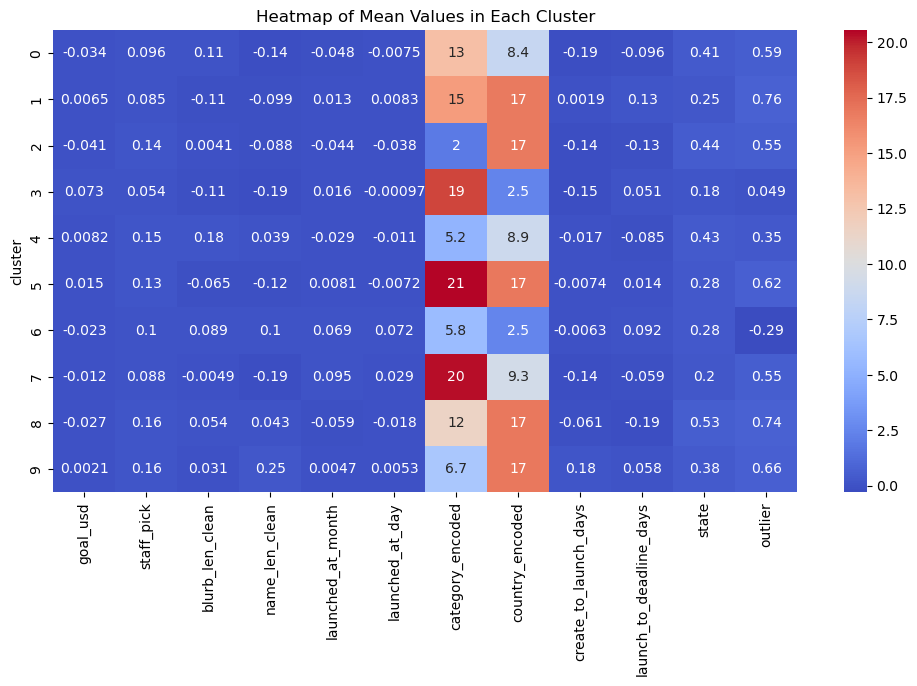

In [28]:
# Analyzing Clusters

# Plotting the distribution of projects in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=df_cleaned)
plt.title('Distribution of Projects in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Projects')
plt.show()

# Analyzing mean values of features in each cluster
cluster_mean_values = df_cleaned.groupby('cluster').mean()
print(cluster_mean_values)

# Visualizing the mean values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_mean_values, annot=True, cmap='coolwarm')
plt.title('Heatmap of Mean Values in Each Cluster')
plt.show()

In [29]:
# Silhouette score:

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_cleaned[columns_to_keep], df_cleaned['cluster'])
print(f"The average silhouette score for the clustering is: {silhouette_avg}")

The average silhouette score for the clustering is: 0.34073185521236327


### DBSCAN

In [30]:
# Load dataset:
df = pd.read_excel('Kickstarter.xlsx')


df = df[df['state'].isin(['failed', 'successful'])]
df['category'] = df['category'].fillna('unknown')
df_cleaned = df.dropna(subset=['state'])
df_cleaned['goal_usd'] = df_cleaned['goal'] * df_cleaned['static_usd_rate']
df_cleaned['state'] = df_cleaned['state'].map({'failed': 0, 'successful': 1})

category_encoder = LabelEncoder()
country_encoder = LabelEncoder()
df_cleaned['category_encoded'] = category_encoder.fit_transform(df_cleaned['category'])
df_cleaned['country_encoded'] = country_encoder.fit_transform(df_cleaned['country'])

columns_to_keep = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
                   'launched_at_month', 'launched_at_day', 'category_encoded', 
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days','state']
df_cleaned = df_cleaned[columns_to_keep]

# List of numerical columns to be normalized
numerical_cols = ['goal_usd', 'create_to_launch_days', 'launch_to_deadline_days','launched_at_month',
                  'launched_at_day','launch_to_deadline_days','blurb_len_clean', 'name_len_clean']

scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Isolation Forest for outlier detection


# The 'contamination' parameter is the proportion of outliers we expect in the data
# It can be set to 'auto' for IsolationForest to determine it automatically
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=0)
outliers = iso_forest.fit_predict(df_cleaned)

# Convert numpy array to a DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=columns_to_keep)

# Add a new column for outliers, where -1 indicates an outlier and 1 indicates an inlier
df_cleaned['outlier'] = outliers


# Reduce the dimensionality of the data

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned[numerical_cols])


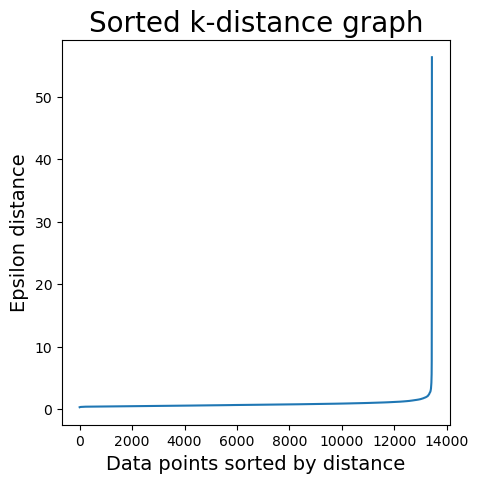

In [31]:
# K-nearest neighbors

# Find the optimal eps value using the Nearest Neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df_cleaned[numerical_cols])
distances, indices = neighbors.kneighbors(df_cleaned[numerical_cols])
distances = np.sort(distances[:,10], axis=0)

plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('Sorted k-distance graph', fontsize=20)
plt.xlabel('Data points sorted by distance', fontsize=14)
plt.ylabel('Epsilon distance', fontsize=14)
plt.show()

# The optimal value for epsilon will be at the point of maximum curvature in the graph,
# which is often referred to as the "elbow" point


In [32]:
# Applying DBSCAN clustering

dbscan = DBSCAN(eps=4, min_samples=10)
clusters = df_cleaned['cluster_dbscan'] = dbscan.fit_predict(df_cleaned[columns_to_keep])

# Calculate silhouette score for DBSCAN
# Note: silhouette_score can only be calculated if more than one cluster is found
# and noise points are not considered in the score
labels = df_cleaned['cluster_dbscan']
if len(set(labels)) - (1 if -1 in labels else 0) > 1:  # More than one cluster excluding noise
    silhouette_avg_dbscan = silhouette_score(df_cleaned[columns_to_keep], labels)
    print(f"The average silhouette score for the DBSCAN clustering is: {silhouette_avg_dbscan}")
else:
    print("Silhouette score cannot be calculated if there is only one cluster or all points are considered noise.")

# Display the first few rows with DBSCAN cluster labels
print(df_cleaned.head())


The average silhouette score for the DBSCAN clustering is: 0.46159392171435754
   goal_usd  staff_pick  blurb_len_clean  name_len_clean  launched_at_month  \
0 -0.045782       False         0.292687        1.181589          -1.373222   
1 -0.053288       False         0.607394        0.353015          -1.373222   
4 -0.058571       False        -0.022019       -0.061272          -1.373222   
5 -0.057914       False         0.292687       -0.475559          -1.373222   
6 -0.036871       False         0.607394       -1.304133          -1.373222   

   launched_at_day  category_encoded  country_encoded  create_to_launch_days  \
0         0.306195                 6                9               0.151024   
1         0.306195                22                5              -0.373715   
4         0.306195                 3               17              -0.452921   
5         0.306195                12               17              -0.254906   
6         0.192578                 6          

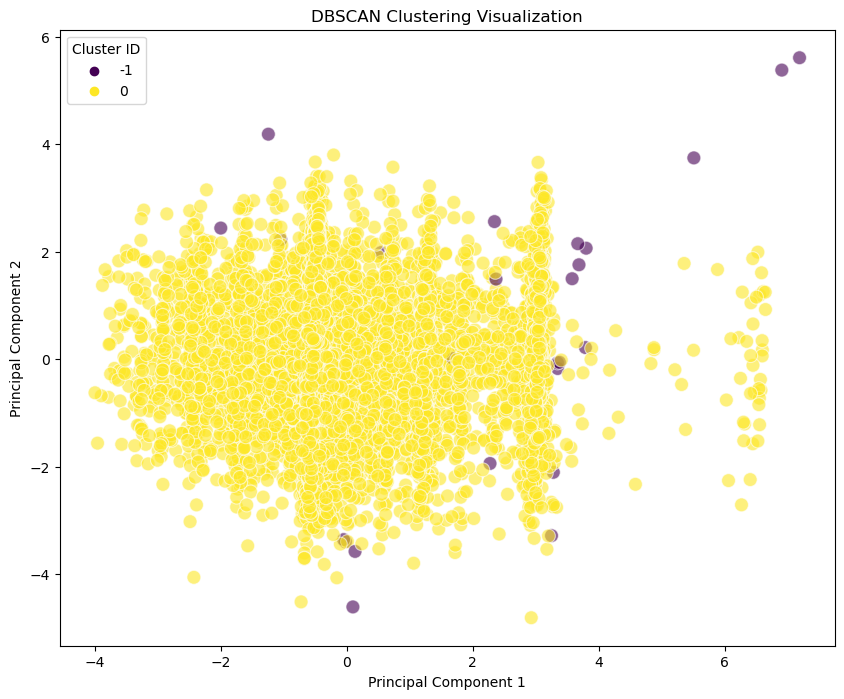

In [33]:
# Visualize:

# Reduce the data to two principal components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned[numerical_cols])
df_cleaned['pca1'] = df_pca[:, 0]
df_cleaned['pca2'] = df_pca[:, 1]

# Plotting the clusters using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_dbscan', data=df_cleaned, palette='viridis', s=100, alpha=0.6)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster ID')
plt.show()


In [34]:
# Assuming 'df_cleaned' is your DataFrame and 'cluster_dbscan' is the column with DBSCAN labels
unique_labels = set(df_cleaned['cluster_dbscan'])
num_clusters = len(unique_labels) - (-1 in unique_labels)  # Subtract 1 if there is noise (-1 label)

print(f"Number of clusters (excluding noise): {num_clusters}")


Number of clusters (excluding noise): 1


## Part 2 - Test on "Kickstarter-Grading-Sample.xlsx"

In [35]:
# Load the grading sample dataset
grading_df = pd.read_excel('Kickstarter-Grading-Sample.xlsx')

In [36]:
grading_df = grading_df[grading_df['state'].isin(['failed', 'successful'])]
grading_df['category'] = grading_df['category'].fillna('unknown')
grading_df_cleaned = grading_df.dropna(subset=['state'])
grading_df_cleaned['goal_usd'] = grading_df_cleaned['goal'] * grading_df_cleaned['static_usd_rate']
grading_df_cleaned['state'] = grading_df_cleaned['state'].map({'failed': 0, 'successful': 1})

category_encoder = LabelEncoder()
country_encoder = LabelEncoder()
grading_df_cleaned['category_encoded'] = category_encoder.fit_transform(grading_df_cleaned['category'])
grading_df_cleaned['country_encoded'] = country_encoder.fit_transform(grading_df_cleaned['country'])

columns_to_keep = ['goal_usd', 'staff_pick', 'blurb_len_clean', 'name_len_clean',
                   'launched_at_month', 'launched_at_day', 'category_encoded', 
                   'country_encoded', 'create_to_launch_days', 'launch_to_deadline_days','state']
grading_df_cleaned = grading_df_cleaned[columns_to_keep]

# List of numerical columns to be normalized
numerical_cols = ['goal_usd', 'create_to_launch_days', 'launch_to_deadline_days','launched_at_month',
                  'launched_at_day','launch_to_deadline_days','blurb_len_clean', 'name_len_clean']

scaler = StandardScaler()

# Apply the scaler to the numerical columns
grading_df_cleaned[numerical_cols] = scaler.fit_transform(grading_df_cleaned[numerical_cols])



# Isolation Forest for outlier detection

# The 'contamination' parameter is the proportion of outliers we expect in the data
# It can be set to 'auto' for IsolationForest to determine it automatically
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=0)
outliers = iso_forest.fit_predict(grading_df_cleaned)

# Convert numpy array to a DataFrame
grading_df_cleaned = pd.DataFrame(grading_df_cleaned, columns=columns_to_keep)

# Add a new column for outliers, where -1 indicates an outlier and 1 indicates an inlier
grading_df_cleaned['outlier'] = outliers

# Display the first few rows with outlier labels
print(grading_df_cleaned.head())

   goal_usd  staff_pick  blurb_len_clean  name_len_clean  launched_at_month  \
0 -0.109563       False         1.149232       -0.458427           1.439127   
1 -0.029555        True        -0.084985       -1.253519           1.439127   
3 -0.127564       False         1.149232       -1.253519           1.439127   
4 -0.084132       False        -0.702093        1.131756           1.439127   
5 -0.117896       False        -1.936310        0.336665           1.439127   

   launched_at_day  category_encoded  country_encoded  create_to_launch_days  \
0         0.674632                 6               16               0.886091   
1         0.674632                22               16               0.085269   
3         0.674632                20               16              -0.270653   
4         0.674632                22               11              -0.367048   
5         0.674632                22                9              -0.404123   

   launch_to_deadline_days  state  outlier  

### K-means on grading sample dataset

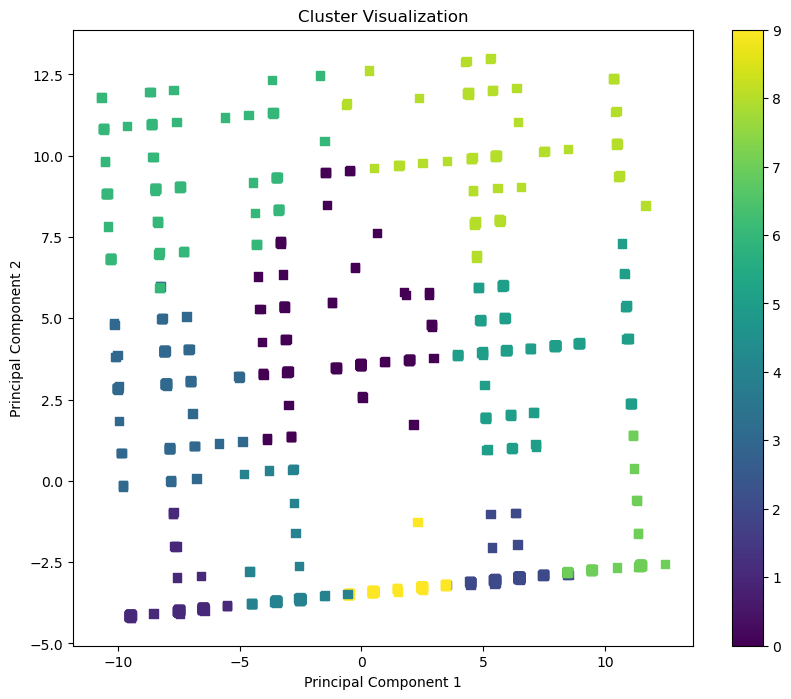

In [37]:
# Fitting K-means to the dataset with the optimal number of clusters
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
grading_df_cleaned['cluster'] = kmeans.fit_predict(grading_df_cleaned)


# Reduce data dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(grading_df_cleaned[columns_to_keep])

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=grading_df_cleaned['cluster'], cmap='viridis', marker='s')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar() 
plt.show()

In [38]:
# Silhouette score:

# Calculate the silhouette score
silhouette_avg = silhouette_score(grading_df_cleaned[columns_to_keep], grading_df_cleaned['cluster'])
print(f"The average silhouette score for the clustering is: {silhouette_avg}")

The average silhouette score for the clustering is: 0.3178422034409927


### DBSCAN on grading sample dataset

In [39]:
# DBSCAN:

# Reduce the dimensionality of the data

pca = PCA(n_components=2)
df_pca = pca.fit_transform(grading_df_cleaned[numerical_cols])


# Applying DBSCAN clustering

# You may need to adjust the 'eps' and 'min_samples' parameters
dbscan = DBSCAN(eps=4, min_samples=10)
clusters = grading_df_cleaned['cluster_dbscan'] = dbscan.fit_predict(grading_df_cleaned[columns_to_keep])

# Calculate silhouette score for DBSCAN
# Note: silhouette_score can only be calculated if more than one cluster is found
# and noise points are not considered in the score
labels = grading_df_cleaned['cluster_dbscan']
if len(set(labels)) - (1 if -1 in labels else 0) > 1:  # More than one cluster excluding noise
    silhouette_avg_dbscan = silhouette_score(grading_df_cleaned[columns_to_keep], labels)
    print(f"The average silhouette score for the DBSCAN clustering is: {silhouette_avg_dbscan}")
else:
    print("Silhouette score cannot be calculated if there is only one cluster or all points are considered noise.")

# Display the first few rows with DBSCAN cluster labels
print(grading_df_cleaned.head())


The average silhouette score for the DBSCAN clustering is: 0.313418608918346
   goal_usd  staff_pick  blurb_len_clean  name_len_clean  launched_at_month  \
0 -0.109563       False         1.149232       -0.458427           1.439127   
1 -0.029555        True        -0.084985       -1.253519           1.439127   
3 -0.127564       False         1.149232       -1.253519           1.439127   
4 -0.084132       False        -0.702093        1.131756           1.439127   
5 -0.117896       False        -1.936310        0.336665           1.439127   

   launched_at_day  category_encoded  country_encoded  create_to_launch_days  \
0         0.674632                 6               16               0.886091   
1         0.674632                22               16               0.085269   
3         0.674632                20               16              -0.270653   
4         0.674632                22               11              -0.367048   
5         0.674632                22            